In [10]:
import sys
import random
import numpy as np
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv

from IPython.display import Image
from scipy import optimize

from tyssue import config, Sheet, SheetGeometry, History, EventManager
from tyssue import SheetGeometry as geom
from tyssue import PlanarGeometry as geom
from tyssue.draw.plt_draw import create_gif
from tyssue.draw.plt_draw import plot_forces
from tyssue.draw import sheet_view
from tyssue.dynamics import effectors, model_factory
from tyssue.dynamics import PlanarModel
from tyssue.dynamics import SheetModel as model
from tyssue.generation import three_faces_sheet
from tyssue.solvers.viscous import EulerSolver
from tyssue.solvers.quasistatic import QSSolver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import plot_forces
from tyssue.io import hdf5
import copy

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.quasistatic import QSSolver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model


from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division

import warnings
warnings.filterwarnings('ignore')



collision solver could not be imported You may need to install CGAL and re-install tyssue


In [4]:
# area = the absolute value of Ax(By - Cy) + Bx(Cy - Ay) + Cx(Ay - By) divided by 2

#TriangleArea = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )

In [5]:
#2D cell map

cellmap = Sheet.planar_sheet_2d('2D', nx=5, ny=7, distx=1, disty=1)

C++ extension are not available for this version


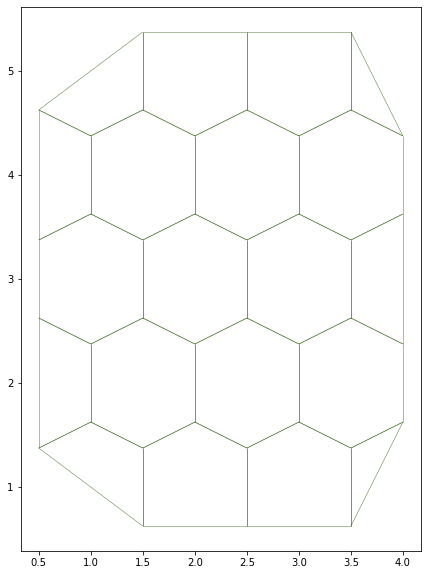

In [6]:
#visualisation

cellmap.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap)

fig, axis = sheet_view(cellmap)

fig.set_size_inches(10, 10)

In [20]:
cellmap.edge_df[

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,is_valid,rx,ry,phi,sub_area
edge,,,,,,,,,,,,,,,,,,,,
0,16,0.28125,0.750000,0,19,0.0,0.75,1.5,0.625,1.5,1.375,1.125000,1.250000,0.0,0.75,True,0.375000,-0.625000,-1.030377,0.140625
1,17,0.15625,0.559017,0,16,-0.5,0.25,1.5,1.375,1.0,1.625,1.125000,1.250000,-0.5,0.25,True,0.375000,0.125000,0.321751,0.078125
2,18,0.21875,0.559017,0,17,-0.5,-0.25,1.0,1.625,0.5,1.375,1.125000,1.250000,-0.5,-0.25,True,-0.125000,0.375000,1.892547,0.109375
3,19,0.34375,1.250000,0,18,1.0,-0.75,0.5,1.375,1.5,0.625,1.125000,1.250000,1.0,-0.75,True,-0.625000,0.125000,2.944197,0.171875
4,3,0.50000,1.000000,1,19,1.0,0.00,1.5,0.625,2.5,0.625,2.000000,1.125000,1.0,0.00,True,-0.500000,-0.500000,-2.356194,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34,0.50000,1.000000,18,37,-1.0,0.00,3.5,5.375,2.5,5.375,3.000000,4.875000,-1.0,0.00,True,0.500000,0.500000,0.785398,0.250000
96,32,0.37500,0.750000,18,34,0.0,-0.75,2.5,5.375,2.5,4.625,3.000000,4.875000,0.0,-0.75,True,-0.500000,0.500000,2.356194,0.187500
97,35,0.12500,0.559017,19,36,0.5,-0.25,3.5,4.625,4.0,4.375,3.666667,4.791667,0.5,-0.25,True,-0.166667,-0.166667,-2.356194,0.062500


In [7]:
cellmap.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,is_valid,rx,ry,phi,sub_area
edge,,,,,,,,,,,,,,,,,,,,
0,16,0.28125,0.750000,0,19,0.0,0.75,1.5,0.625,1.5,1.375,1.125000,1.250000,0.0,0.75,True,0.375000,-0.625000,-1.030377,0.140625
1,17,0.15625,0.559017,0,16,-0.5,0.25,1.5,1.375,1.0,1.625,1.125000,1.250000,-0.5,0.25,True,0.375000,0.125000,0.321751,0.078125
2,18,0.21875,0.559017,0,17,-0.5,-0.25,1.0,1.625,0.5,1.375,1.125000,1.250000,-0.5,-0.25,True,-0.125000,0.375000,1.892547,0.109375
3,19,0.34375,1.250000,0,18,1.0,-0.75,0.5,1.375,1.5,0.625,1.125000,1.250000,1.0,-0.75,True,-0.625000,0.125000,2.944197,0.171875
4,3,0.50000,1.000000,1,19,1.0,0.00,1.5,0.625,2.5,0.625,2.000000,1.125000,1.0,0.00,True,-0.500000,-0.500000,-2.356194,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34,0.50000,1.000000,18,37,-1.0,0.00,3.5,5.375,2.5,5.375,3.000000,4.875000,-1.0,0.00,True,0.500000,0.500000,0.785398,0.250000
96,32,0.37500,0.750000,18,34,0.0,-0.75,2.5,5.375,2.5,4.625,3.000000,4.875000,0.0,-0.75,True,-0.500000,0.500000,2.356194,0.187500
97,35,0.12500,0.559017,19,36,0.5,-0.25,3.5,4.625,4.0,4.375,3.666667,4.791667,0.5,-0.25,True,-0.166667,-0.166667,-2.356194,0.062500


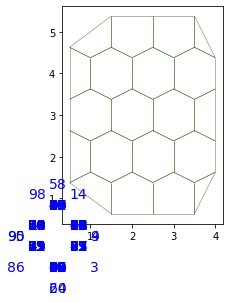

In [19]:
fig, ax = sheet_view(cellmap)

for edge, data in cellmap.edge_df.iterrows():
    ax.text(data.dx, data.dy, edge, fontsize=14, color="b")

In [10]:
def change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity,
                 prefered_area, line_tension_FRC, line_tension_ECM, endTime):
    
   
    cellmap_original.update_specs(config.dynamics.quasistatic_plane_spec())
    #history_original = History(cellmap_original, extra_cols={"edge":["dx", "dy"]})

    cellmap_original.face_df["face_elasticity"] = face_elasticity
    cellmap_original.face_df["prefered_area"] = cellmap_original.face_df["area"].mean()*prefered_area

    cellmap_original.vert_df["viscosity"] = 1    
    cellmap_original.edge_df["line_tension"] = line_tension_FRC + line_tension_ECM
    
    cellmap_original.face_df["perimeter_elasticity"] = 0
    cellmap_original.face_df["contractility"] = 0
    
    
    solver1 = EulerSolver(cellmap_original, geom_original, model_original, history=history_original, auto_reconnect=True)
    res1 = solver1.solve(tf=endTime, dt=0.05)
    
    cellmap_new = copy.deepcopy(cellmap_original)
    geom_new = copy.deepcopy(geom_original)
    model_new = copy.deepcopy(model_original)
    history_new = copy.deepcopy(history_original)
    
    return [cellmap_new, geom_new, model_new, history_new]

In [5]:
def triangle_area(x1,y1,x2,y2,x3,y3):
    area = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )
    return area

In [6]:
face_groups_df = cellmap.edge_df.groupby(['face'])
face_groups_df.groups

{0: [0, 1, 2, 3], 1: [4, 5, 6, 7, 8], 2: [9, 10, 11, 12, 13], 3: [14, 15, 16], 4: [17, 18, 19, 20], 5: [21, 22, 23, 24, 25, 26], 6: [27, 28, 29, 30, 31, 32], 7: [33, 34, 35, 36, 37, 38], 8: [39, 40, 41, 42, 43, 44], 9: [45, 46, 47, 48, 49, 50], 10: [51, 52, 53, 54, 55, 56], 11: [57, 58, 59, 60], 12: [61, 62, 63, 64], 13: [65, 66, 67, 68, 69, 70], 14: [71, 72, 73, 74, 75, 76], 15: [77, 78, 79, 80, 81, 82], 16: [83, 84, 85, 86], 17: [87, 88, 89, 90, 91], 18: [92, 93, 94, 95, 96], 19: [97, 98, 99]}

In [7]:
for face in range(len(face_groups_df)):
    allTrianglesArea = 0
    edgesPerFace = face_groups_df.indices[face];
    print([face])
    firstEdge = cellmap.edge_df.loc[edgesPerFace[0]];
    for numEdge in range(len(edgesPerFace)-1):
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]];
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        allTrianglesArea = allTrianglesArea + triangle_area(firstEdge.sx, firstEdge.sy, currentEdge.tx, currentEdge.ty, nextEdge.tx, nextEdge.ty)
        print(allTrianglesArea)

[0]
0.1875
0.5
0.5
[1]
0.375
0.6875
0.875
0.875
[2]
0.375
0.6875
0.875
0.875
[3]
0.1875
0.1875
[4]
0.1875
0.5
0.5
[5]
0.125
0.5
0.8125
1.0
1.0
[6]
0.125
0.5
0.8125
1.0
1.0
[7]
0.125
0.5
0.8125
1.0
1.0
[8]
0.125
0.5
0.8125
1.0
1.0
[9]
0.125
0.5
0.8125
1.0
1.0
[10]
0.125
0.5
0.8125
1.0
1.0
[11]
0.3125
0.5
0.5
[12]
0.1875
0.5
0.5
[13]
0.125
0.5
0.8125
1.0
1.0
[14]
0.125
0.5
0.8125
1.0
1.0
[15]
0.125
0.5
0.8125
1.0
1.0
[16]
0.125
0.5
0.5
[17]
0.125
0.5
0.875
0.875
[18]
0.125
0.5
0.875
0.875
[19]
0.1875
0.1875


In [8]:
print(cellmap.face_df)

             y  is_alive  perimeter    area         x  num_sides  id
face                                                                
0     1.250000         1   3.118034  0.5000  1.125000          4   0
1     1.125000         1   3.618034  0.8750  2.000000          5   0
2     1.125000         1   3.618034  0.8750  3.000000          5   0
3     1.208333         1   2.427051  0.1875  3.666667          3   0
4     2.000000         1   3.118034  0.5000  0.750000          4   0
5     2.000000         1   3.736068  1.0000  1.500000          6   0
6     2.000000         1   3.736068  1.0000  2.500000          6   0
7     2.000000         1   3.736068  1.0000  3.500000          6   0
8     3.000000         1   3.736068  1.0000  1.000000          6   0
9     3.000000         1   3.736068  1.0000  2.000000          6   0
10    3.000000         1   3.736068  1.0000  3.000000          6   0
11    3.000000         1   3.118034  0.5000  3.750000          4   0
12    4.000000         1   3.11803

In [9]:
for face in range(len(face_groups_df)):
    edgesPerFace = face_groups_df.indices[face];
    for numEdge in range(len(edgesPerFace)-1):
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]];
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]]
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        if nextEdge.sx != currentEdge.tx or nextEdge.sy != currentEdge.ty:
            print(face, 'False')
        else:
            print(face, 'Correct')

0 Correct
0 Correct
0 Correct
1 Correct
1 Correct
1 Correct
1 Correct
2 Correct
2 Correct
2 Correct
2 Correct
3 Correct
3 Correct
4 Correct
4 Correct
4 Correct
5 Correct
5 Correct
5 Correct
5 Correct
5 Correct
6 Correct
6 Correct
6 Correct
6 Correct
6 Correct
7 Correct
7 Correct
7 Correct
7 Correct
7 Correct
8 Correct
8 Correct
8 Correct
8 Correct
8 Correct
9 Correct
9 Correct
9 Correct
9 Correct
9 Correct
10 Correct
10 Correct
10 Correct
10 Correct
10 Correct
11 Correct
11 Correct
11 Correct
12 Correct
12 Correct
12 Correct
13 Correct
13 Correct
13 Correct
13 Correct
13 Correct
14 Correct
14 Correct
14 Correct
14 Correct
14 Correct
15 Correct
15 Correct
15 Correct
15 Correct
15 Correct
16 Correct
16 Correct
16 Correct
17 Correct
17 Correct
17 Correct
17 Correct
18 Correct
18 Correct
18 Correct
18 Correct
19 Correct
19 Correct


In [11]:
cellmap.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,is_valid,rx,ry,phi,sub_area
edge,,,,,,,,,,,,,,,,,,,,
0,16,0.28125,0.750000,0,19,0.0,0.75,1.5,0.625,1.5,1.375,1.125000,1.250000,0.0,0.75,True,0.375000,-0.625000,-1.030377,0.140625
1,17,0.15625,0.559017,0,16,-0.5,0.25,1.5,1.375,1.0,1.625,1.125000,1.250000,-0.5,0.25,True,0.375000,0.125000,0.321751,0.078125
2,18,0.21875,0.559017,0,17,-0.5,-0.25,1.0,1.625,0.5,1.375,1.125000,1.250000,-0.5,-0.25,True,-0.125000,0.375000,1.892547,0.109375
3,19,0.34375,1.250000,0,18,1.0,-0.75,0.5,1.375,1.5,0.625,1.125000,1.250000,1.0,-0.75,True,-0.625000,0.125000,2.944197,0.171875
4,3,0.50000,1.000000,1,19,1.0,0.00,1.5,0.625,2.5,0.625,2.000000,1.125000,1.0,0.00,True,-0.500000,-0.500000,-2.356194,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34,0.50000,1.000000,18,37,-1.0,0.00,3.5,5.375,2.5,5.375,3.000000,4.875000,-1.0,0.00,True,0.500000,0.500000,0.785398,0.250000
96,32,0.37500,0.750000,18,34,0.0,-0.75,2.5,5.375,2.5,4.625,3.000000,4.875000,0.0,-0.75,True,-0.500000,0.500000,2.356194,0.187500
97,35,0.12500,0.559017,19,36,0.5,-0.25,3.5,4.625,4.0,4.375,3.666667,4.791667,0.5,-0.25,True,-0.166667,-0.166667,-2.356194,0.062500
